#1. Setup and Import Libraries

In [ ]:
# Install libraries (if needed)
!pip install umap-learn

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
import umap

# Display confirmation
print("Libraries imported successfully.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00
Libraries imported successfully.


#2. Load and Explore the Dataset

Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


<Figure size 1200x600 with 0 Axes>

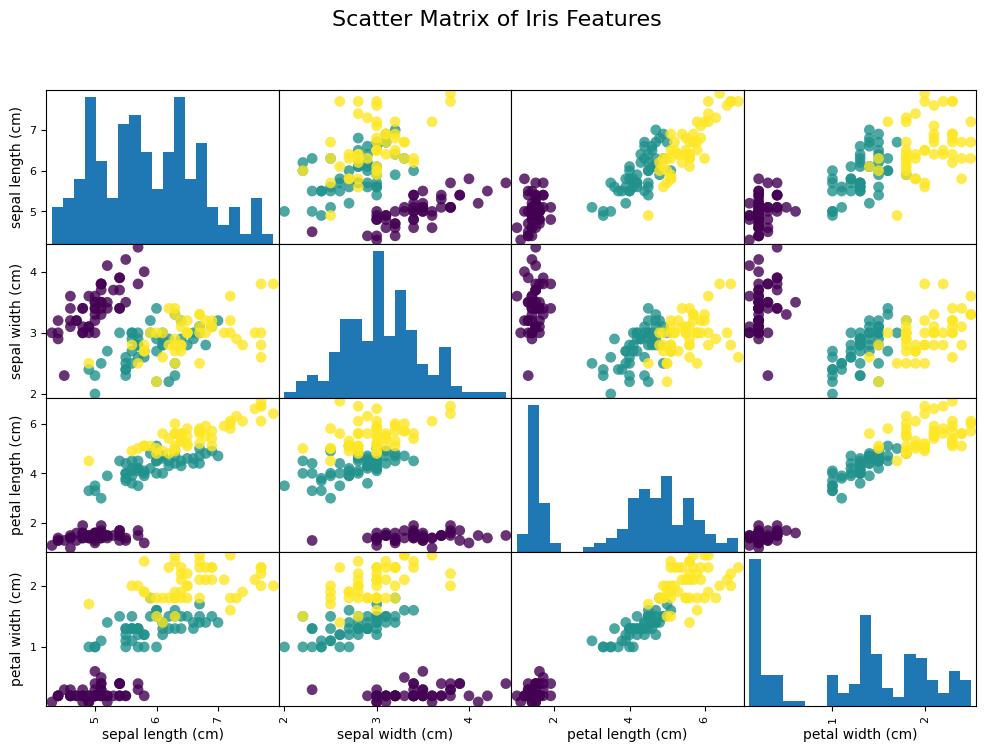

In [ ]:
# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target classes

# Convert to a DataFrame for easier exploration
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display dataset details
print(f"Dataset shape: {X.shape}")
print("Feature names:", data.feature_names)
print("Classes:", data.target_names)
print("\nFirst few rows of the dataset:")
print(df.head())

# Visualize feature distributions
plt.figure(figsize=(12, 6))
pd.plotting.scatter_matrix(df.iloc[:, :-1], c=y, figsize=(12, 8), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap='viridis')
plt.suptitle("Scatter Matrix of Iris Features", fontsize=16)
plt.show()


#3. Dimensionality Reduction Techniques

##3.1 Locally Linear Embedding (LLE)

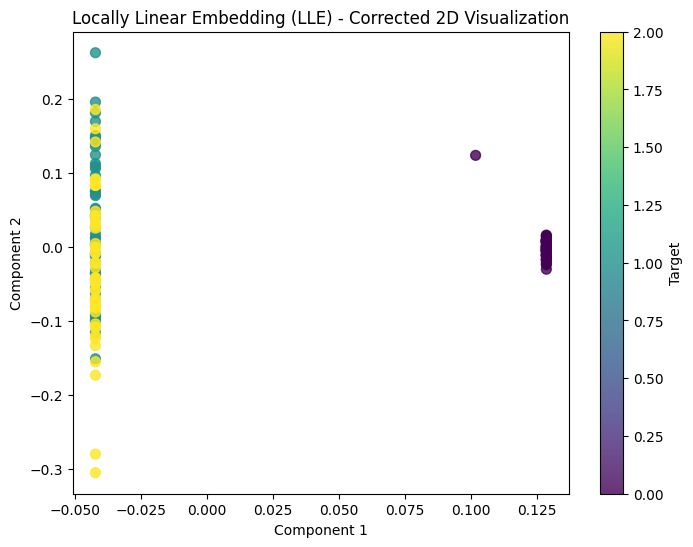

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LLE with updated parameters
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=15, random_state=42)
X_lle = lle.fit_transform(X_scaled)

# Plot the corrected LLE results
plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Target')
plt.title("Locally Linear Embedding (LLE) - Corrected 2D Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


##3.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


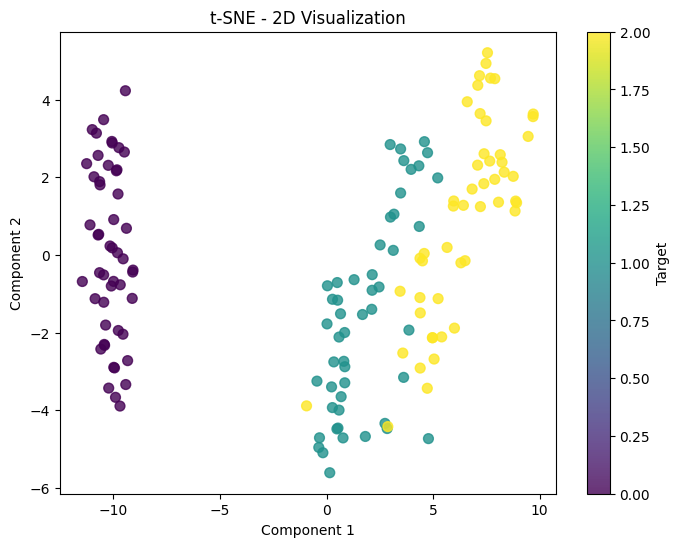

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Target')
plt.title("t-SNE - 2D Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


##3.3 UMAP (Uniform Manifold Approximation and Projection)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


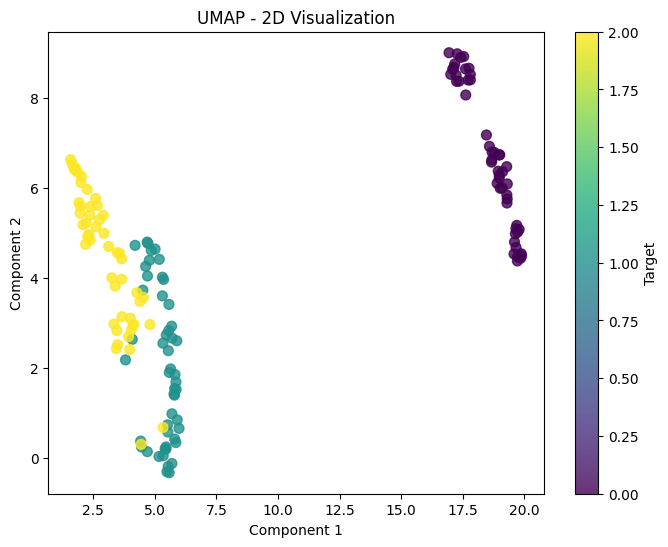

In [ ]:
# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Plot the UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Target')
plt.title("UMAP - 2D Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


##3.4 ISOMAP (Isometric Mapping)

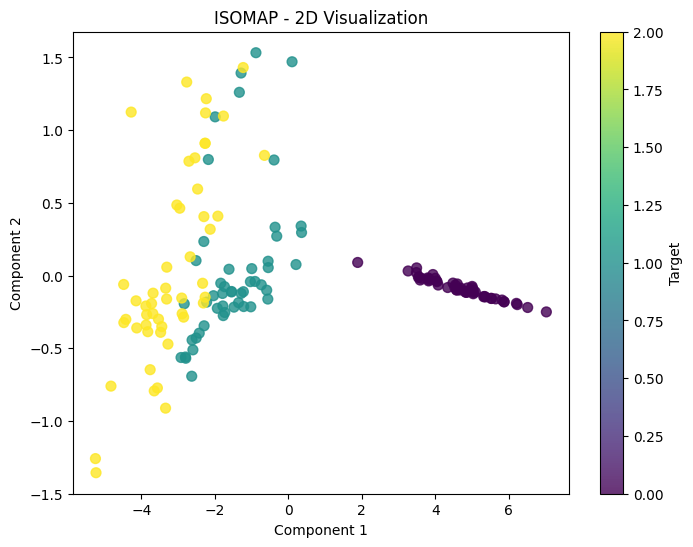

In [ ]:
# Apply ISOMAP
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_scaled)

# Plot the ISOMAP results
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Target')
plt.title("ISOMAP - 2D Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


##3.5 Randomized PCA

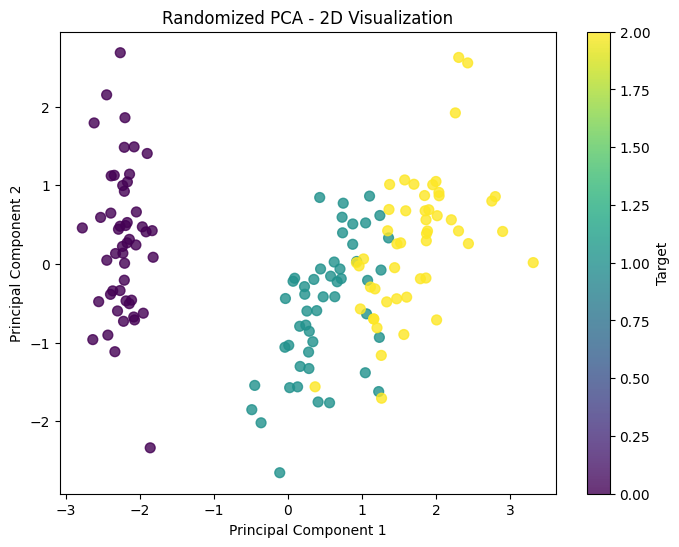

In [ ]:
# Apply Randomized PCA
pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Target')
plt.title("Randomized PCA - 2D Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


##3.6 Kernel PCA

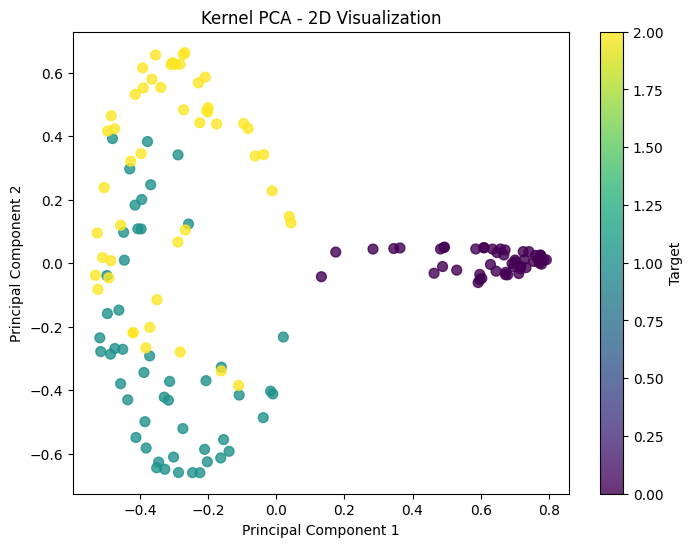

In [ ]:
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5, random_state=42)
X_kernel_pca = kernel_pca.fit_transform(X_scaled)

# Plot the Kernel PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Target')
plt.title("Kernel PCA - 2D Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


##3.7 Incremental PCA

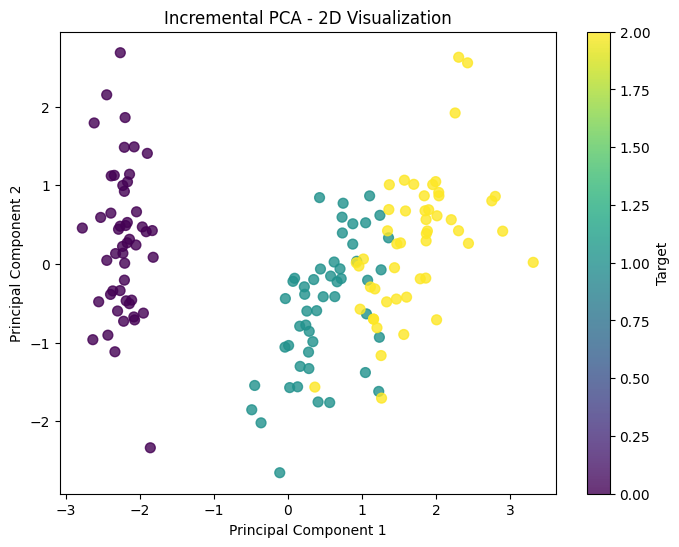

In [ ]:
from sklearn.decomposition import IncrementalPCA

# Apply Incremental PCA
incremental_pca = IncrementalPCA(n_components=2, batch_size=10)
X_incr_pca = incremental_pca.fit_transform(X_scaled)

# Plot the Incremental PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_incr_pca[:, 0], X_incr_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Target')
plt.title("Incremental PCA - 2D Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


##3.8 Factor Analysis

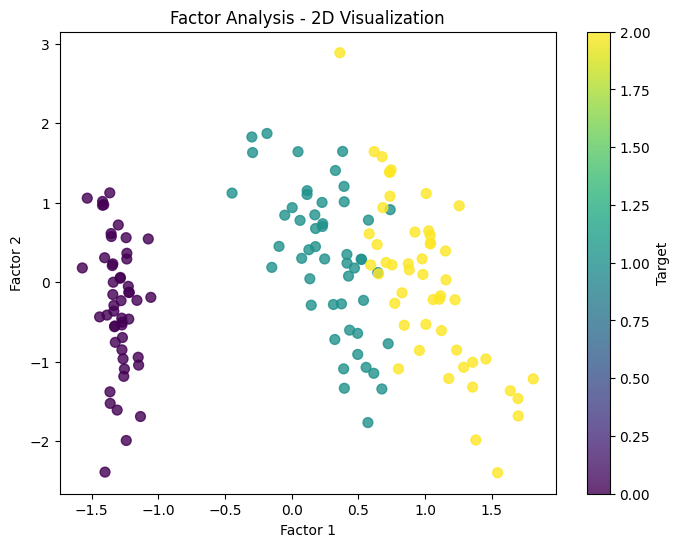

In [ ]:
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X_scaled)

# Plot the Factor Analysis results
plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Target')
plt.title("Factor Analysis - 2D Visualization")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()
